# <center>Digital Image Processing - Problem Set 4</center>

### Student Names:

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


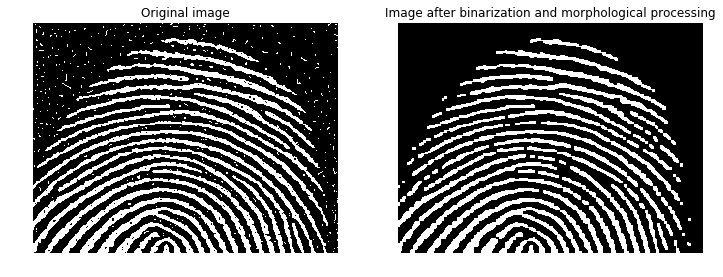

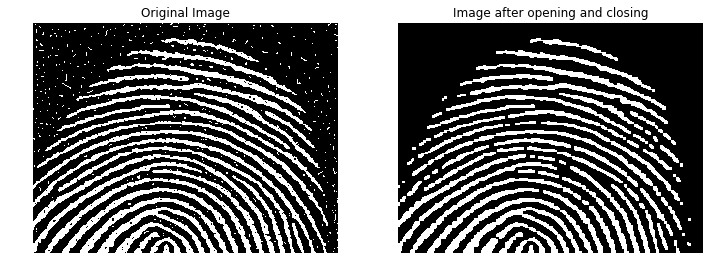

In [11]:
#http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline

def erode_dilate(img):
    kernel = np.ones((3,3),np.uint8) #Create a square-shaped structuring element of size 3 by 3
    paso1 = cv2.erode(img,kernel,iterations = 1) #Erode the input image
    paso2 = cv2.dilate(paso1,kernel,iterations = 1) #Dilate the result of paso1
    paso3 = cv2.dilate(paso2,kernel,iterations = 1) #Dilate the result of paso2
    paso4 = cv2.erode(paso3,kernel,iterations = 1)  #Erode the result of paso3
    return paso4
def opening_closing(img):
    kernel = np.ones((3,3),np.uint8) #Create a square-shaped structuring element of size 3 by 3
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) #Perform opening of the input image
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) # Compute the closing of the result of opening
    return closing
img = cv2.imread('noisy_fingerprint.jpg',0)  #Load Image
erodil= erode_dilate(img) #Call function ero_dil()
opclo=opening_closing(img) #Call function opening_closing()

plt.figure(figsize=(12,12));
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray');plt.title('Original image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(erodil, cmap = 'gray');plt.title('Image after binarization and morphological processing');plt.axis('off') #Display the image
plt.figure(figsize=(12,12));
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray');plt.title('Original Image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(opclo, cmap = 'gray');plt.title('Image after opening and closing');plt.axis('off') #Display the image
plt.show()

<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">Para el desarrollo de este problema 1 se desarrollaron dos funciones. La primera función fue 
erode_dilate() que recibe como parámetro la imagen a la cual se le aplicará la primera secuencia de operaciones morfológicas, erosión y dilatación, especificadas en el planteamiento del inciso y da como resultado la imagen con las operaciones morfológicas aplicadas. La segunda función desarrollada fue opening_closing(), la cual recibe como parámetro la imagen a la cual se le desea aplicar las operaciones opening y closing, retornando la imagen que se construye luego de los pasos especificados en el inciso.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">Con el propósito de desarrollar este inciso se utilizó la librería OPENCV a través de la cual se ejecutaron distintas funciones, la primera fue la función ones(). Esta función recibe el tamaño y tipo de datos deseado para la matriz, en este caso la matriz será 3x3 y con datos enteros sin signo de 8 bits (uint8). La función ones() devolverá una nueva matriz de forma y tipo dado, rellenada con unos. Luego se utilizaron las funciones que realizan la operación morfológica erosión y dilatación, erode() y dilate() respectivamente, estas reciben como parámetros la imagen a la cual se la aplicará la operación morfológica, el elemento estructurante y el número de iteraciones. Seguido a esto se empleó la función nmorphologyEx() que permite aplicar a una imagen otras operaciones morfológicas como lo son opening y closing. Esta función recibe como parámetros las imagen a la cual se le aplicará la operación morfológica, el tipo de operación morfológica que se empeará (en este inciso serán cv2.MORPH_OPEN y cv2.MORPH_CLOSE) y el elemento estructurante o kernel.</p>
<p style="text-align:justify">Finalmente, se emplea la función imread() la cual lee una imagen cualquiera y recibe dos parámetros: La ruta donde se encuentra la imagen y un indicador que especifica el tipo de color de la imagen cargada. También se utilizó la función imshow() para mostrar las imágenes originales y resultantes de las secuencias.</p>

<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">Las operaciones morfológicas simplifican imágenes y conservan las principales características de forma de los objetos. La erosión se concibe usualmente como una reducción de la imagen original y la dilatación como la expansión de una imagen. Se puede decir que la dilatación y la erosión son muy similares en el sentido de una hacer la operación morfológica al objeto la otra lo hace al fondo de la imagen. Estas operaciones morfológicas pueden aplicarse independientemente a una imagen, pero también se combinan para obtener mejores resultados. Estas combinaciones son opening y closing, la primera obtiene la dilatación de una imagen y luego una erosión de esta, por el contrario, closing obtiene la erosión de una imagen dilatada.</p>
<p>A partir de lo desarrollado en este inciso se logró identificar que aplicar la primera secuencia en una imagen (erosión-dilatación-dilatación-erosión) da el mismo resultado aplicando la segunda secuencia opening-closing (dilatación- erosión-erosión-dilatación), puesto que se están aplicando a la imagen las mismas operaciones morfológicas pero con dos secuencias distintas.</p>

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.

In [1]:
import cv2
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tkinter import *  #Ojo este inciso usa Tkinter

def reg_filling(src):
    plt.ion()
    fig = plt.figure();
    plt.imshow(src,cmap='gray')
    plt.title('Select coordinate')
    coord= plt.ginput(1)  #Specify coordinate in image
    xcoord= int(round(coord[0][0]));ycoord=int(round(coord[0][1])) #Separate both x and y coordinates
    X = np.zeros((src.shape[0], src.shape[1]),dtype=np.uint8) #This is X0
    X[ycoord,xcoord]=255 #Replace matrix with coordinates given in plt.ginput
    B = 255*cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)).astype(np.uint8)  #Define structuring element 
    A = src  #A is the image
    A_C= cv2.bitwise_not(A)  #Complement
    #Start operation
    x_prev = X[:,:]  #Copy of X (X(k-1))
    X = cv2.dilate(X,B,iterations=1)
    X = np.bitwise_and(X,A_C)  #Xk
    cont = 0
    while(not(np.array_equal(x_prev,X))):  #Loop until convergence (In this case x_final = X)
        x_prev = X[:,:]
        X = cv2.dilate(X,B,iterations =1)
        X = np.bitwise_and(X,A_C)
        cont +=1
    plt.close(fig)
    fig1 = plt.figure()
    plt.imshow(X,cmap='gray')
    plt.show()
    imgsal = np.bitwise_or(X,A)
    plt.close(fig1)
    return imgsal


def exit():
    root.destroy()
#Tk interface to specify number of holes to be filled
root = Tk()
root.minsize(width=300, height=200)
r = Label (root, text= "¿Cuántas veces desea rellenar?")
r.place(relx=0.5, rely=0.25, anchor=CENTER)
r1 = Label (root, text= "Recommended: 17")
r1.place(relx=0.5, rely=0.375, anchor=CENTER)
text_entered = StringVar()
e = Entry(root, textvariable=text_entered)
e.place(relx=0.5, rely=0.5, anchor=CENTER)

button = Button(root,text="Close",command=exit)
button.place(relx=0.5, rely=0.75, anchor=CENTER)

root.mainloop()
src = cv2.imread('spheres.jpg',0)
global text_entered
content = text_entered.get()
filled_img = reg_filling(src)

    
for i in range(int(content)-1):
    filled_img = reg_filling(filled_img)
orig = plt.figure();    
plt.imshow(src,cmap='gray')
plt.title('Original image')
plt.figure();
plt.imshow(filled_img,cmap='gray')
plt.title('Final image with holes filled') 





/usr/local/lib/python2.7/dist-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">La función reg_filling desarrollada en este inciso recibe como parámetro la imagen a la cual se le desea rellenar los vacíos o huecos y retorna una imagen con los vacíos o huecos rellenados. El número de vacíos a rellenar es especificado a través de una interfaz de la libreria Tkinter.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">Para el desarrollo de este inciso se utilizaron las librerias OPENCV, Matplotlib y Numpy a través de las cuales se emplearon distintas funciones de las que se puede resaltar ginput() mediante la cual es posible capturar las coordenadas de una figura en las cuales se presiona click. El próposito de utilizar esta función es en este caso el de especificar la coordenada del vacío o hueco que se desea rellenar. Esta función recibe como parámetro de entrada el número de clicks que se van a grabar por lo que en este caso se especificó el número 1 debido a que solo se registrará una coordenada. Cabe destacar que para utilizar esta función fue necesario desactivar el modo "inline plotting" de la librería matplotlib y se decidió utilizar Qt debido a su facilidad de uso y a que ya se contaba con esta librería. Adicionalmente, se utilizó la función getStructuringElement() de la librería OPENCV la cual recibe como parámetro de entrada la forma del elemento estructurante a definir. En este caso se definió un elemento estructurante en forma de cruz y de tamaño 3x3. Para definir esta forma se utilizó la funcion MORPH_CROSS de la librería openCV. Posterior a esto y teniendo en cuenta que las operaciones iterativas que se llevan a cabo incluyen procesamiento morfologico, fue necesario utilizar la función dilate() de la librería OPENCV la cual realiza un procesamiento de tipo dilatación. Esta función recibe como parámetro de entrada una imagen, el elemento estructurante o kernel que se aplicará sobre toda la imagen y el número de iteraciones que tendrá este procesamiento. Además de las funciones mencionadas también se usaron las funciones bitwise_and, bitwise_or y bitwise_not de la libreria Numpy, las cuales en este caso tienen el propósito de llevar a cabo las operaciones intersección, unión y complemento. Finalmente, se desarrolló una interfaz en Tkinter que permite especificar el número de vacíos o huecos que se desean llenar en la imagen y de esta forma poder visualizar la imagen con todos los vacíos llenados si es el caso.</p>



## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="files/crosses.png"/>
<img src="files/connected.jpg"/>

4:  32
4:  1
4:  9
4:  8
4:  17
4:  17
4:  2
4:  1


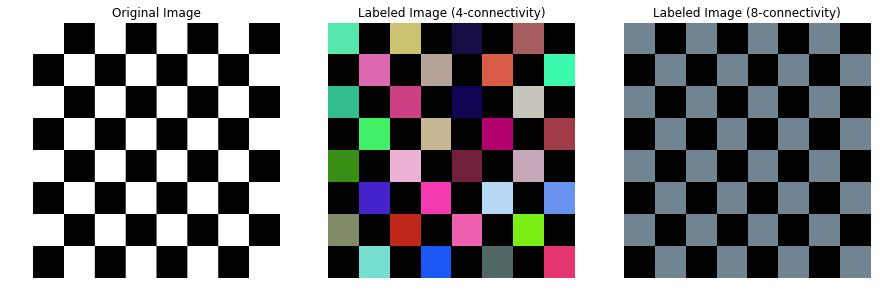

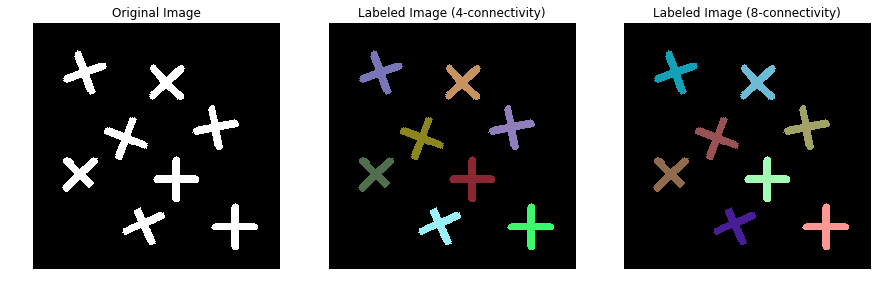

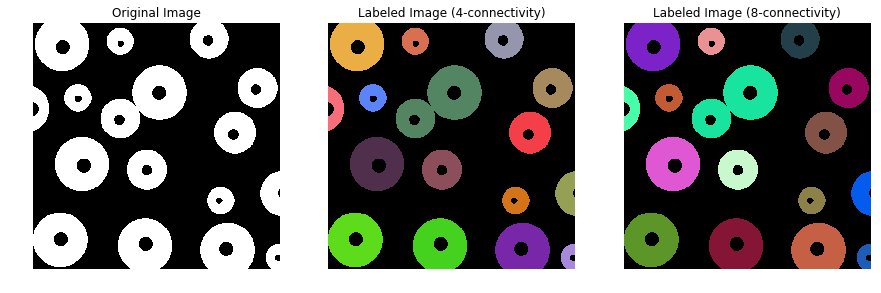

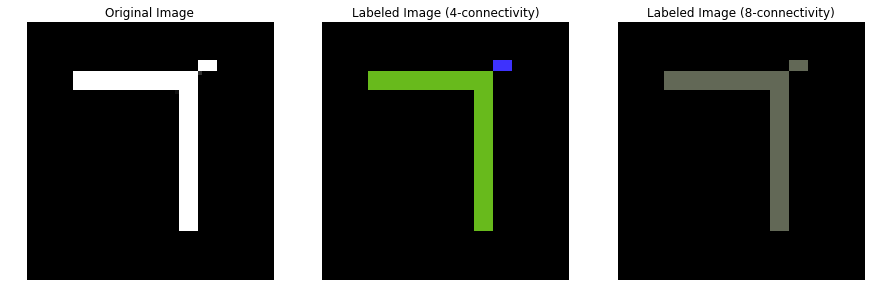

In [22]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def labelConnectedComponents(image, adj):
    ret, image2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY) #Aplicar Thresholding
    image = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR) #Convertir a RGB/BGR
    if(adj == 8):
        '''
        contours, hierarchy = cv2.findContours(image2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        print "contours: ", len(contours)
        cont = 0
        for i in range(len(contours)):
            cont+= 1
            r = random.randint(0,255)
            g = random.randint(0,255)
            b = random.randint(0,255)
            cv2.drawContours(image, contours, i, (b,g,r), thickness=-1)
        print "8: ", cont
        '''
        h, w = image2.shape #Obtener dimensiones de la imagen
        mask = np.zeros((h+2, w+2), np.uint8) #Crear mascaras necesaria para floodfill
        mask2 = np.zeros((h+2, w+2), np.uint8)
        cont = 0 #Contador de componentes conexas
        for i in range(h):
            for j in range(w):
                if(image2[i,j] == 255): #Si esta en una componente no marcada
                    cont+=  1 #Aumentar contador
                    r = random.randint(0,255) #Elegir un color aleatoriamente
                    g = random.randint(0,255)
                    b = random.randint(0,255)
                    cv2.floodFill(image, mask,(j,i), (b,g,r), flags = 8) #Realizar floodfill con conectividad 8
                    cv2.floodFill(image2, mask2,(j,i), 125, flags = 8) #Marcar la componente
        print "4: ", cont
        
    elif(adj == 4):
        h, w = image2.shape #Obtener dimensiones de la imagen
        mask = np.zeros((h+2, w+2), np.uint8) #Crear mascaras necesaria para floodfill
        mask2 = np.zeros((h+2, w+2), np.uint8)
        cont = 0 #Contador de componentes conexas
        for i in range(h):
            for j in range(w):
                if(image2[i,j] == 255): #Si esta en una componente no marcada
                    cont+=  1 #Aumentar contador
                    r2 = random.randint(0,255) #Elegir un color aleatoriamente
                    g2 = random.randint(0,255)
                    b2 = random.randint(0,255)
                    cv2.floodFill(image, mask,(j,i), (b2,g2,r2), flags = 4) #Realizar floodfill con conectividad 8
                    cv2.floodFill(image2, mask2,(j,i), 125, flags = 4) #Marcar la componente
        print "4: ", cont
    return image
images_names=["chessboard.png","crosses.png","spheres.jpg","stack.png"]
for i in range(len(images_names)):
    imag = cv2.imread(images_names[i],cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(15,15)); plt.subplot(1,3,1);plt.imshow(imag, cmap='gray'); plt.title("Original Image");plt.axis('off')
    imag2 = labelConnectedComponents(imag, 4) #Llamada con conectividad 4
    imag3 = labelConnectedComponents(imag, 8) #Llamada con conectividad 8
    plt.subplot(1,3,2); plt.imshow(imag2); plt.title("Labeled Image (4-connectivity)");plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(imag3); plt.title("Labeled Image (8-connectivity)");plt.axis('off')

<h3>- Descripción de la función desarrollada:</h3> 
<p style="text-align:justify">
La funcion labelConnectedComponents() desarrollada en este inciso marca las componentes conexas de una imagen. Recibe como parametros de entrada la imagen y el tipo de adyacencia según la cual se buscaran los componentes: cuatro u ocho. Retorna la imagen original con las componentes marcadas con un color distinto para cada una.
</p>
<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
El primer procedimiento que se realiza dentro de la funcion es aplicar thresholding a la imagen para binarizarla, en caso de que originalmente no lo este. Una vez hecho esto, se  guarda en una variable distinta el resultado anterior pero convertido a BGR/RGB para poder almacenar colores en ella. 
</p>
<p style="text-align:justify">
Para poder realizar el marcado de las componentes de la imagen se utilizo la funcion floodfill() de la librería OpenCV, la cual rellena de color una componente de la imagen. Esta funcion recibe como parametros la imagen original, una mascara, un punto semilla, un color y el tipo de adyacencia según el cual se va a rellenar la componente. La mascara es una matriz con el mismo tamaño de la imagen de entrada para dos pixeles de ancho y de largo y es requerida por floodfill() para operaciones internas, en este caso una matriz de ceros. El punto semilla es una tupla con las coordenadas del punto desde el cual floodfill() va a rellenar la componente, es decir, esencialmente es donde se escoge la componente que se va a rellenar de color. Para definir los colores con los que se rellenan las componentes, se hizo uso de la funcion randint()  de la librería Random, la cual retorna un valor entero pseudo-aleatorio dentro de un rango que se le ingrese. Utilizando esta funcion tres veces se obtienen los tres valores correspondientes a R, G y B para formar un color aleatorio. Finalmente, la adyacencia es igual a la ingresada como parametro de entrada de la funcion labelConnectedComponents().
</p>
<p style="text-align:justify">
Para poder marcar con floodfill() las componentes de la imagen original, se recorren los pixeles de la imagen original binarizada para buscar cuales son iguales a 255, es decir, cuales pertenecen a una componente que no se ha marcado. Si se detecta un pixel asi, se le aplica floodfill() a la imagen BGR/RGB con el color aleatorio creado usando randint() y las coordenadas del pixel. Seguidamente se le aplica floodfill() a la imaen binarizada en las mismas coordenadas con un color fijo, de modo que ya no se detecten pixeles en la misma componente. Al terminar de recorrer los pixeles, cada componente en la imagen RGB/BGR tiene un color distinto y en la imagen binarizada todas tienen el mismo color, indicando que ya no quedan componentes por marcar.
</p>
<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">
Cuando se aplica la funcion a una imagen como crosses.png, con bordes curvilineos de las componentes, la diferencia entre usar una adyacencia de tipo cuatro u ocho no se nota demasiado. Sin embargo, cuando se aplica a imagenes como chessboard.png, con cambios drasticos horizontal y verticamente, si se nota como varía el resultado dependiendo de la adyacencia. Hay que recordar que en la adyacencia de tipo cuatro, solo se verifican los valores de los pixeles (x + 1, y), (x – 1, y), (x, y + 1) y (x, y – 1) mientras que en la adyacencia de tipo ocho tambien se consideran los vecinos diagonales (x + 1, y + 1), (x – 1, y - 1), (x - 1, y + 1) y (x + 1, y – 1).  En el caso de un tablero de ajedrez y con la adyacencia de tipo cuatro, el algoritmo clasifica cada celda blanca como una componente distinta puesto que cuando se alcanza la esquina de cada celda, no hay pixeles blancos arriba, abajo o a los lados puesto que las celdas del mismo color solo son contiguas diagonalmente. Es por esto ultimo que el algoritmo detecta todas las celdas blancas como una sola componente cuando se utiliza la adyacencia de tipo ocho, porque con esta adyacencia tambien se verifican los vecinos diagonales que siempre existen en un tablero de ajedrez.</p>

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

(-0.5, 499.5, 499.5, -0.5)

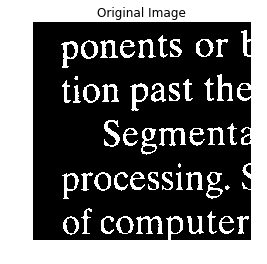

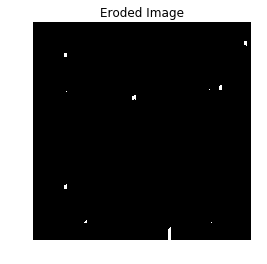

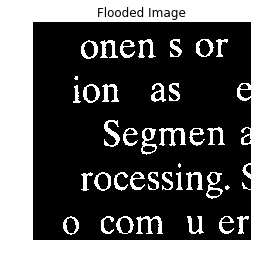

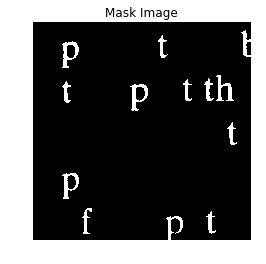

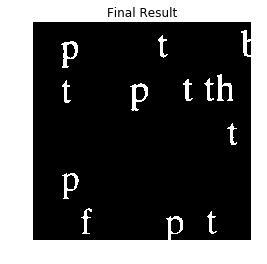

In [13]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def replication(image):
    kernel = np.ones((51,1), np.uint8) #Crear el elemento estructurante
    erosion = cv2.erode(image, kernel) #Aplicar erosion a la imagen
    plt.figure(); plt.imshow(erosion, cmap='gray'); plt.title("Eroded Image");plt.axis('off') #graficar el resultado
    h, w = image.shape #Obtener dimensiones de la imagen
    image2 = image.copy() #Copia de la imagen
    mask = np.zeros((h+2, w+2), np.uint8) #Crear mascara necesaria para floodfill
    for i in range(h):
        for j in range(w):
            if(erosion[i,j] > 0.5): #Si se detecto un caracter alargado verticalmente
                cv2.floodFill(image2, mask,(j,i), 0) #Rellenarlo con negro
    image = image - image2 #Restar a la imagen original, la imagen sin los caracteres encontrados
    return image2, mask, image

imag = cv2.imread("steve_blog.png", cv2.IMREAD_GRAYSCALE)
plt.figure(); plt.imshow(imag, cmap='gray'); plt.title("Original Image");plt.axis('off')
imag2, mask, final = replication(imag)
plt.figure(); plt.imshow(imag2, cmap='gray'); plt.title("Flooded Image");plt.axis('off')
plt.figure(); plt.imshow(mask, cmap='gray'); plt.title("Mask Image");plt.axis('off')
plt.figure(); plt.imshow(final, cmap='gray'); plt.title("Final Result");plt.axis('off')

<h3>- Descripción de la función desarrollada:</h3>    

<p style="text-align:justify">
La funcion replicate() desarrollada en este inciso recibe como parametro de entrada una imagen y replica el resultado mencionado en el articulo de Steve Eddins, realizado en MATLAB,  identificar caracteres con un segmento vertical alargado y eliminar el resto en una imagen.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Para la realizacion de este inciso se utilizo la función erode() de la librería OpenCV, la cual recibe como parametros de entrada, la imagen a la cual se le desea aplicar erosion y el elemento estructurante según el cual se realizará la erosion. En este caso el elemento estructurante es igual a una matriz de unos con tamaño 51x1, tal como se describe en el articulo de Steve Eddins. El resultado de la erosion es una imagen donde solo permanecen restos de las letras que cumplen la condicion deseada. </p>
<p style="text-align:justify">
Lo que se hizo para recuperar las letras apartir de la imagen erosionada fue utilizar la funcion floodfill() de la librería OpenCV de una forma similar a como se uso en el inciso anterior. Se recorrieron todos los pixeles de la imagen erosionada y se aplico floodfill() en el punto en el que se detectara un pixel blanco, aunque en este caso el color fue fijo: negro. En este inciso cobro importancia la mascara usada en la funcion floodfill(). Esta es, como en el inciso anterior, una matriz de ceros. Sin embargo, cada vez que se marca una componente utilizando floodfill(), se marca esa misma componente en la mascara con un color blanco. Es decir, cada vez que se “borra” una letra en la imagen, se marca esa misma letra en la mascara por lo que al concluir el proceso de marcar todas las letras con negro, la mascara contiene todos los caracteres de interes.</p>
<p style="text-align:justify">
Sin embargo, algunas letras presentan ligeras distorsiones por lo que se alcanza un mejor resultado haciendo uso de la imagen con las letras “borradas”. Ya que esta imagen y la original solo se diferencian por la falta de algunos caracteres en una, es posible simplemente restar la imagen sin algunos caracteres a la imagen original, dando como resultado una imagen en la que se encuentran todos los caracteres deseados, sin distorsion alguna.</p>


## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

Tested conditions: Kernel Sizes = [1x1,5x5,9x9]  minVal=[0,50,100] maxVal=[20,100,200]


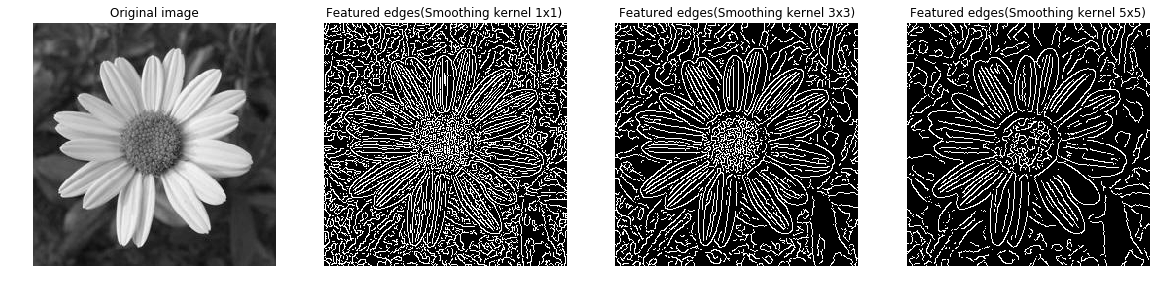

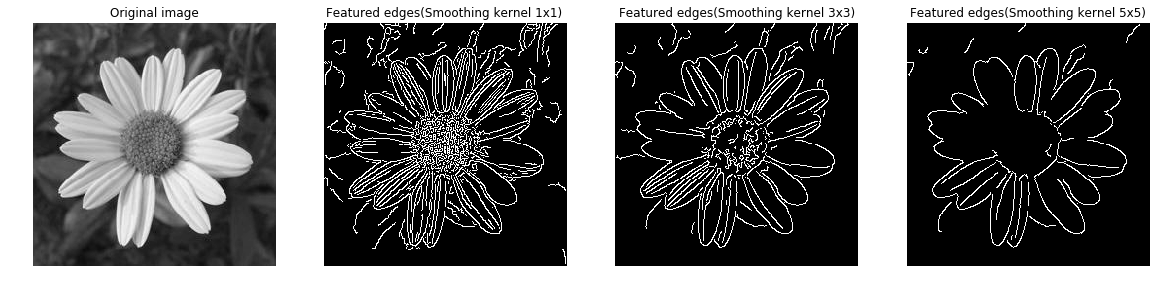

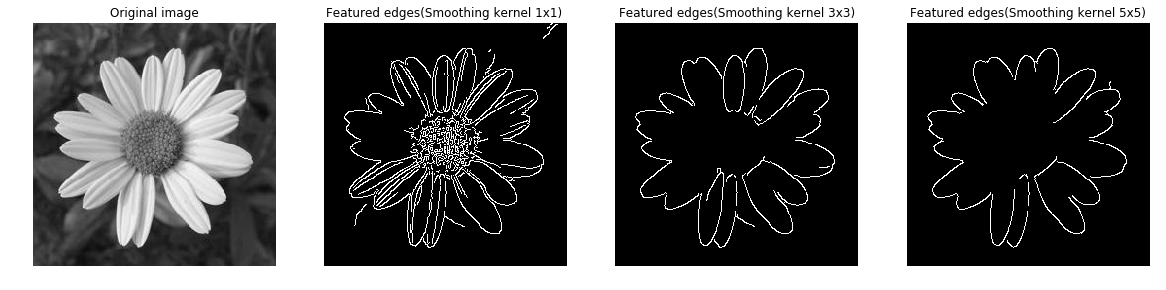

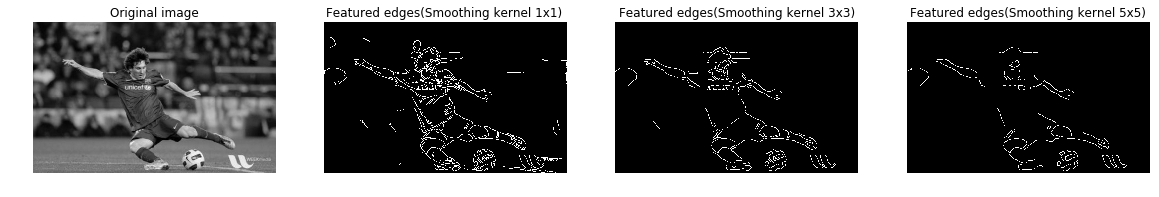

In [12]:
#http://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html
#http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path

def canny(img,sizes_kernel,minVal,maxVal):
    gblu=cv2.GaussianBlur(img,(sizes_kernel,sizes_kernel),0) #Smooth the image with Guassian filter
    canny= cv2.Canny(gblu,minVal,maxVal) #Detects edges using Canny’s method
    return canny #Return edges of the image
images_names=['flower.jpg','messi.PNG']
sizes =[1,5,9]
minval = [0,50,100]
maxval = [20,100,200]
cannyv = []
print("Tested conditions: Kernel Sizes = [1x1,5x5,9x9]  minVal=[0,50,100] maxVal=[20,100,200]")
for i in range(len(images_names)):
    img = cv2.imread(images_names[i],0)
    for j in range(len(maxval)):
        if(i==0 or (i==1 and j>1)):
            canny1 = canny(img,sizes[0],minval[j],maxval[j])
            canny2 = canny(img,sizes[1],minval[j],maxval[j])
            canny3 = canny(img,sizes[2],minval[j],maxval[j])
            plt.figure(figsize=(20,20));
            plt.subplot(1,4,1); plt.imshow(img, cmap = 'gray');plt.title('Original image');plt.axis('off') #Display the image
            plt.subplot(1,4,2); plt.imshow(canny1, cmap = 'gray');plt.title('Featured edges(Smoothing kernel 1x1) ');plt.axis('off') #Display the image
            plt.subplot(1,4,3); plt.imshow(canny2, cmap = 'gray');plt.title('Featured edges(Smoothing kernel 3x3)');plt.axis('off') #Display the image
            plt.subplot(1,4,4); plt.imshow(canny3, cmap = 'gray');plt.title('Featured edges(Smoothing kernel 5x5)');plt.axis('off') #Display the image


    

<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">Para este inciso se desarrolló la función canny() que permite suavizar la imagen con un filtro Gaussiano y luego detectar los bordes de la imagen suavizada usando el método de Canny. Esta función recibe tres parámetros de entrada: La imagen con la cual se trabajará, el tamaño del kernel para el filtro Gaussiano, el valor mínimo y máximo de umbral. Y retorna una imagen con los bordes de la imagen de entrada.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">Con el propósito de desarrollar este inciso se utilizaron varias funciones, una de estas es GaussianBlur() la cual suaviza una imagen convolucionando esta con un kernel de filtro paso bajo. Esta función recibe como parámetros la imagen que se suavizará, el ancho y alto del kernel y la desviación estándar en la dirección X e Y. Otra función  fue Canny() empleada para aplicar el método Canny, esta recibe como parámetros una imagen, en este caso será la imagen suavizada, el valor mínimo y máximo de umbral. También se emplea la función imread() la cual lee una imagen cualquiera y recibe dos parámetros: La ruta donde se encuentra la imagen y un indicador que especifica el tipo de color de la imagen cargada. Finalmente, se utiliza la función imshow() para mostrar las imagen original y las imágenes con los bordes detectados.</p>

<h3>- Análisis de resultados:</h3>
<p style="text-align:justify"> El detector de bordes Canny es un operador para detectar bordes que utiliza un algoritmo de múltiples etapas para detectar una amplia gama de bordes en las imágenes, para este operador se debe tener en cuenta el valor mínimo y el valor máximo de umbral puesto que con estos se decide cuáles de todos los bordes son realmente bordes y cuales no lo son. Esta selección de bordes se realiza de la siguiente manera: todos los bordes con gradiente de intensidad mayor que el máximo valor de umbral, están seguros de ser los bordes del objeto entonces se destacan y los que están por debajo del mínimo valor de umbral están seguros de no ser bordes. Los valores que se encuentran entre estos dos umbrales son clasificados bordes o no bordes en función de su conectividad, es decir, si están conectados a píxeles "seguros" como bordes se consideran parte de los bordes, de lo contrario, no se descartan o se señalan como no bordes.
<p style="text-align:justify">Además, es importante resaltar que el suavizado de una imagen es útil para eliminar ruidos. Realmente elimina contenido de alta frecuencia de la imagen, así que los bordes se borran un poco en esta operación. Por esta razón es importante especificar adecuadamente el tamaño del kernel para el filtro Gaussiano, puesto que dependiendo de este se puede o no eliminar bordes que permitan identificar adecuadamente el objeto de estudio. </p>
<p>A partir de lo desarrollado en este inciso se aprecia que al tener valores erróneos del mínimo y máximo umbral no se logra detectar solo los bordes necesarios para destacar el objeto sino que se resalta cualquier borde del fondo de la imagen, como se observa en las dos primeras filas de imágenes, pero con valores mínimos y máximos de umbral adecuados se aprecia solo los bordes que se necesitan marcar de la figura (ver tercera fila de imágenes). Además de los valores de umbral se debe destacar que la elección del tamaño del kernel para el filtro de suavizado es importante, ya que si este es muy grande muchos bordes se filtraran y a pesar de tener apropiados valores de umbral, la figura no se observará convenientemente porque la mayoría de bordes se borraron con el suavizado de la imagen. </p>

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

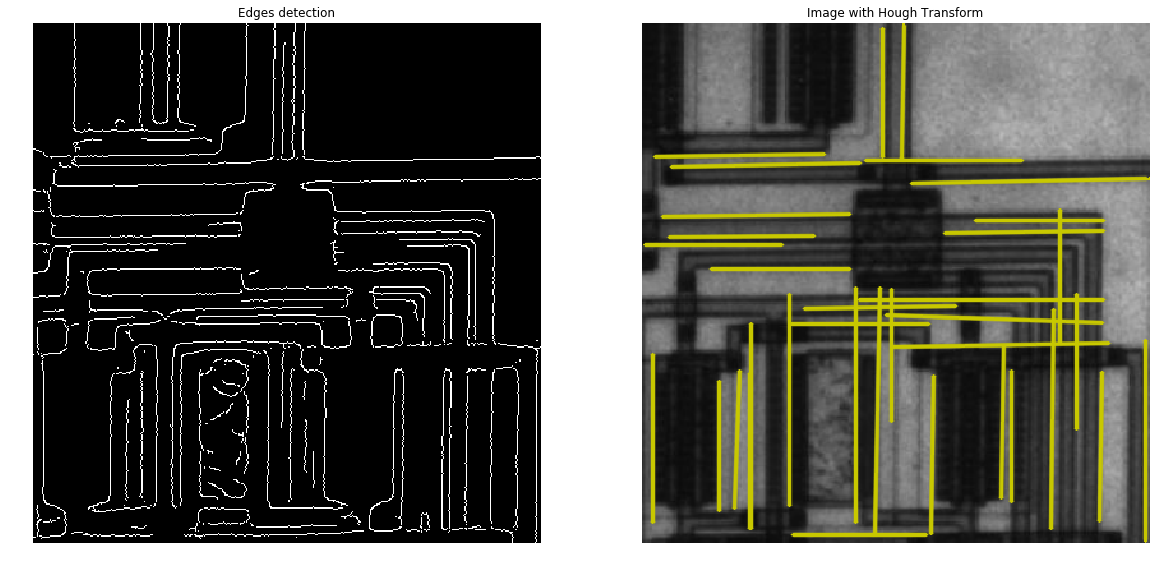

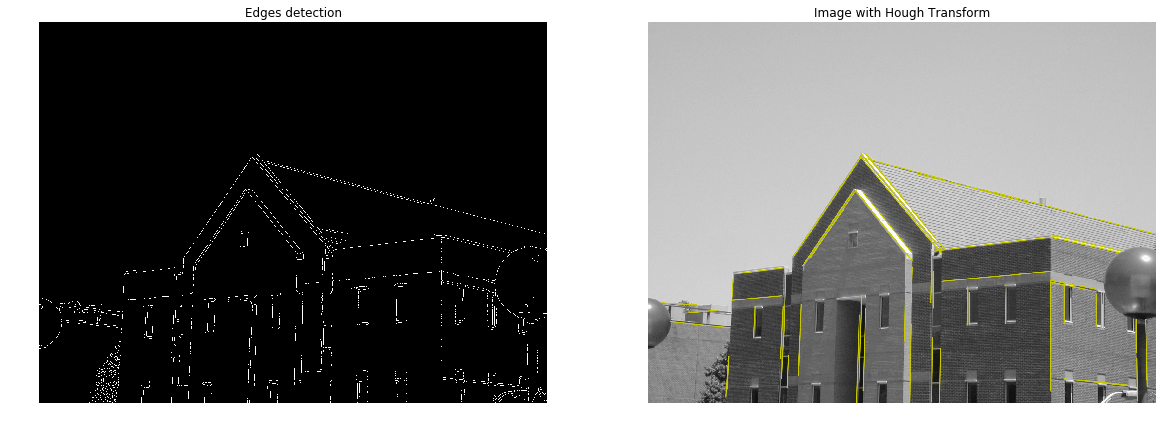

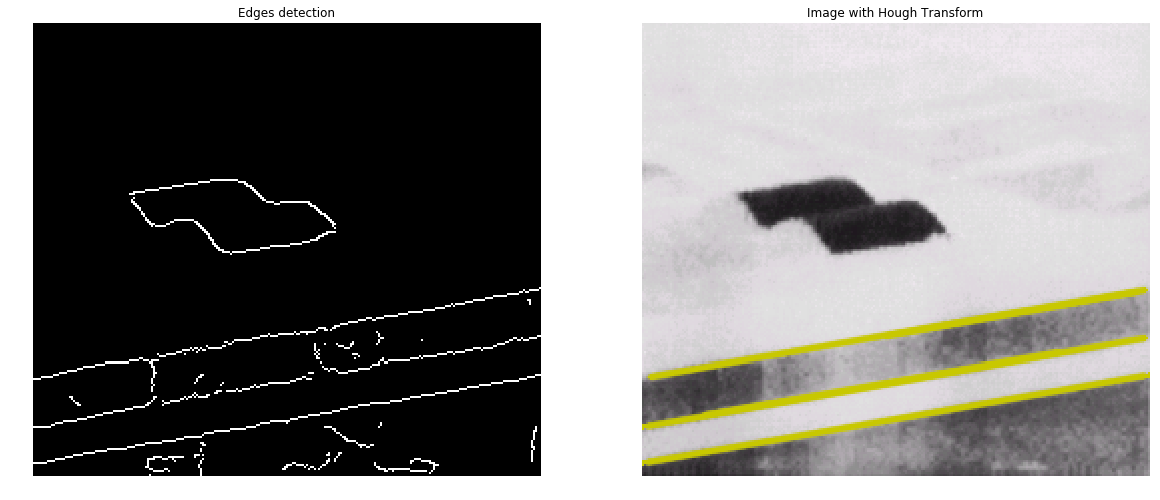

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline   


def Hough_Transform(img):
    gblu=cv2.GaussianBlur(img,(15,15),2.6) #Smooth the image with Guassian filter
    edges = cv2.Canny(gblu,20,40) #Detects edges using Canny’s method
    minLineLength=100
    lines = cv2.HoughLinesP(image=edges,rho=1.6,theta=np.pi/180,threshold=90,minLineLength=100,maxLineGap=20)
    if((cv2.__version__)[0]=='2'):
        for x1,y1,x2,y2 in lines[0]:
            cv2.line(img,(x1,y1),(x2,y2),(200,200,0),2,cv2.CV_AA)
    else:
        a,b,c = lines.shape 
        for i in range(a):
            cv2.line(img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (200, 200, 0), 2, cv2.LINE_AA)# Draw lines
    return edges,img

image= cv2.imread('canny_img.PNG')#Load Image
image_copy= image.copy()
img_edges,img_ht=Hough_Transform(image_copy)#Call function
image1= cv2.imread('building.jpg')#Load Image
image_copy1= image1.copy()
img_edges1,img_ht1=Hough_Transform(image_copy1)#Call function
image2= cv2.imread('prueba.PNG')#Load Image
image_copy2= image2.copy()
img_edges2,img_ht2=Hough_Transform(image_copy2)#Call functio
        
plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(img_edges, cmap = 'gray');plt.title('Edges detection');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(img_ht, cmap = 'gray');plt.title('Image with Hough Transform');plt.axis('off') #Display the image
plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(img_edges1, cmap = 'gray');plt.title('Edges detection');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(img_ht1, cmap = 'gray');plt.title('Image with Hough Transform');plt.axis('off') #Display the image
plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(img_edges2, cmap = 'gray');plt.title('Edges detection');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(img_ht2, cmap = 'gray');plt.title('Image with Hough Transform');plt.axis('off') #Display the image
plt.show()

<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">Se desarrolló la función Hough_Transform() que permite realizar la detección de líneas usando la transformación de Hough, esta función recibirá como parámetro una imagen escala de grises y retorna las líneas detectadas en la parte superior de la imagen de entrada.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">Con el propósito de desarrollar este inciso se utilizaron varias funciones. Una de estas funciones fue GaussianBlur() explicada en el inciso anterior para suavizar la imagen antes de detectar los bordes en esta, también se utilizó la función Canny() para detectar los bordes de la imagen utilizando el método de Canny. Fue necesario utilizar la función HoughLinesP() la cual encuentra los segmentos de línea en una imagen binaria utilizando la transformación probabilística de Hough. Esta función recibe varios parámetros: la imagen con la cual se trabajará, en este caso será la imagen con los bordes detectados, el vector de salida de las líneas, la resolución de distancia del acumulador en píxeles (Rho), ángulo de resolución del acumulador en radianes (theta), valor de umbral, longitud de línea mínima (segmentos de línea más cortos que los que son rechazados) e intervalo máximo permitido entre puntos en la misma línea para enlazarlos. También se utilizó la función line() la cual dibuja un segmento de línea que conecta dos puntos, para realizar esto necesita los siguientes parámetros: imagen, primer punto del segmento de línea, segundo punto del segmento de línea, color de línea, grosor de línea, tipo de línea (línea antialiada en este caso)</p>
<p style="text-align:justify">Finalmente, se emplea la función imread() la cual lee una imagen cualquiera y recibe dos parámetros: La ruta donde se encuentra la imagen y un indicador que especifica el tipo de color de la imagen cargada. También se utilizó la función imshow() para mostrar las imágenes</p>

<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">Al desarrollar este inciso se logró verificar los resultados del inciso anterior, es decir, que para resaltar las bordes adecuados de una imagen se debe tener en cuenta el tamaño del kernel para el suavizado de la imagen y el valor máximo y mínimo de umbral para aplicar el método Canny. Por otro lado, se destaca que encontrar los segmentos de línea en una imagen binaria utilizando la transformación probabilística de Hough depende del valor de rho, theta y el intervalo máximo permitido en la misma línea para enlazar puntos. Esto se evidencia en las imágenes mostradas, en las tres imagenes se manejaron los mismos parámetros y a pesar de esto en la primera imagen solo se destacan algunas lineas, por el contrario, en las demás imágenes se logra destacar todas las líneas que se desean resaltar de la imagen al tener los parámetros adecuados. En conclusión, los parámetros para utilizar la transformación de Hough dependerá de cada imagen.</p>

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


('El valor inicial de Threshold en Fig.1 es:', 126)
('El nuevo valor de Threshold en Fig.1 es:', 57.919877604166672)
('El valor inicial de Threshold en Fig.2 es:', 126)
('El nuevo valor de Threshold en Fig.2 es:', 37.450999798330528)


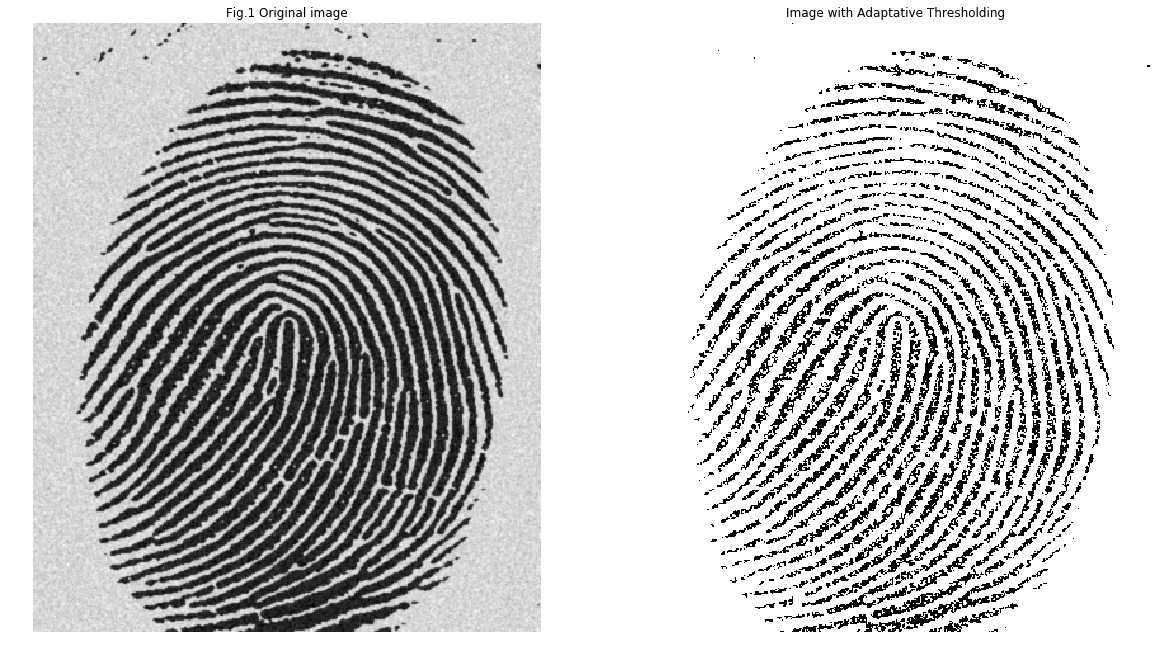

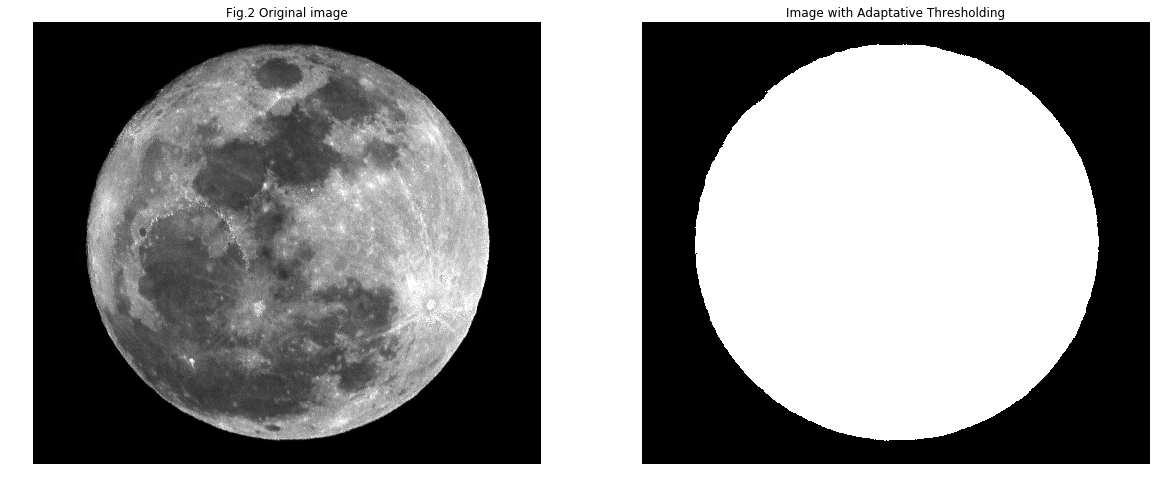

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline

def Adaptative_Thresholding(img, T0):
    _, th = cv2.threshold(img, T0, 255, cv2.THRESH_BINARY) #Binarized image at the inicial threshold value
    g1_u1 = np.mean(th*img) #Compute the intensity averages μ1
    g2_u2 = np.mean(cv2.bitwise_not(th)*img) #Compute the intensity averages μ2
    NT = (g1_u1 + g2_u2)/2 #Compute a new threshold value
    if np.abs(NT - T0) > 1e-13: #Difference in  T  between successive iterations
        return Adaptative_Thresholding(img, NT) #Repeat steps 2-4
    else:
        _, thNew = cv2.threshold(img, NT, 255, cv2.THRESH_BINARY) #Binarized image at the new threshold value
        return thNew,NT #Return binarized image with the new threshold value and new threshold value 

image = cv2.imread('fingerprint.jpg',0)#Load Image
ti = (np.max(image)+np.min(image))/2 # Initial threshold value
print('El valor inicial de Threshold en Fig.1 es:',ti)
bimg,newT = Adaptative_Thresholding(image, ti) #Call function
print('El nuevo valor de Threshold en Fig.1 es:',newT)

image1 = cv2.imread('moon.jpg',0)#Load Image
ti1 = (np.max(image1)+np.min(image1))/2 # Initial threshold value
print('El valor inicial de Threshold en Fig.2 es:',ti)
bimg1,newT1 = Adaptative_Thresholding(image1, ti1) #Call function
print('El nuevo valor de Threshold en Fig.2 es:',newT1)

plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(image, cmap = 'gray');plt.title('Fig.1 Original image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(bimg, cmap = 'gray');plt.title('Image with Adaptative Thresholding');plt.axis('off') #Display the image
plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(image1, cmap = 'gray');plt.title('Fig.2 Original image');plt.axis('off') #Display the image
plt.subplot(1,2,2); plt.imshow(bimg1, cmap = 'gray');plt.title('Image with Adaptative Thresholding');plt.axis('off') #Display the image
plt.show()
    

<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">Para este inciso se desarrollo la función Adaptative_Thresholding() la cual permite implementar el algoritmo de umbral adaptativo que se describe en el inciso. Esta función toma como parámetros de entrada la imagen y el valor de umbral inicial el cual se busca con el promedio de los valores de intensidad máxima y mínima de la imagen. Como resultado, esta función retorna la imagen binarizada con el nuevo valor umbral y este nuevo valor umbral.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
Para desarrollar el problema 7 se emplearon las siguientes funciones:
<ul>
<li>threshold(): Esta función aplica un umbral de nivel fijo a cada elemento del arreglo, tomando como parámetros de entrada una imagen, el valor de umbral, el máximo valor de umbral y el tipo de umbral (en este caso será THRESH_BINARY). Y devuelve el valor de umbral calculado. </li>
<li>mean(): Permite calcular un promedio (media) de los elementos del array que recibe como parámetro de entrada.</li>
<li>abs(): Calcula un valor absoluto de cada elemento de matriz. Recibe una expresión como parámetro de entrada y retorna el valor absoluto de dicha expresión.</li>
<li>max(): Esta función calcula el máximo de una matriz. Recibe como parámetro de entrada una matriz y devuelve el máximo valor de esta.<li>
min(): Calcula el mínimo de una matriz. Recibe como parámetro de entrada una matriz y devuelve su mínimo valor.
</ul>  

<p style="text-align:justify">Finalmente, se emplearon la función imread() y la función imshow(), la primera lee una imagen cualquiera y recibe dos parámetros: La ruta donde se encuentra la imagen y un indicador que especifica el tipo de color de la imagen cargada. Y la segunda función permite mostrar una imagen</p>

<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">Luego de implementar el algoritmo de umbral adaptativo simple como se describe en el inciso, se puede decir que con este se logra tener un valor de umbral centralizado con respecto a la intensidad de la imagen. Con esto los valores menores y mayores que el umbral tendrán un valor de intensidad media igual. Las iteraciones que se realizan son para buscar un valor de umbral más adecuado al propuesto inicialmente.</p>
<p style="text-align:justify">Se observa en las imágenes que el valor inicial de umbral que se especifica a partir del promedio de los valores de intensidad máxima y mínima de la imagen, será mucho mayor que el valor hallado luego de iterar varias veces y encontrar una diferencia menor que 1e-13 entre los valores de umbral sucesivos. Para estas imágenes el proceso culmina luego de 2 iteraciones.  </p>

## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


(-0.5, 499.5, 427.5, -0.5)

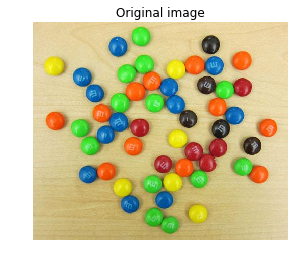

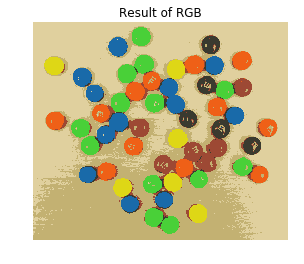

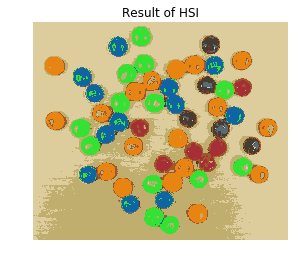

In [43]:
def toHSI(image):
    height = np.size(image, 0)
    width = np.size(image, 1)
    H = np.zeros((height,width))
    S = np.zeros((height,width))
    I = np.zeros((height,width))
    img = cv2.normalize(image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    for x in range(0, height):
        for y in range(0, width):
            R = img.item(x,y,2)
            G = img.item(x,y,1)
            B = img.item(x,y,0)
            I.itemset((x,y),(R+G+B)/3)
            if(R==G and G==B):
                S.itemset((x,y),0)
                H.itemset((x,y),0)
            else:
                w = np.arccos(0.5*((R-G)+(R-B))/(np.sqrt((R-G)*(R-G) + ((R - B)*(G - B)))))
                if(G >= B):
                    H.itemset((x,y),w)
                else:
                    H.itemset((x,y),2*np.pi-w)
                    
                if(I[x,y]>0):
                    S.itemset((x,y), 1 - np.amin([R,G,B])/I.item(x,y))
                else:
                    S.itemset((x,y),0)
    return [H, S, I]

def toRGB(H, S, I):
    height = np.size(H, 0)
    width = np.size(H, 1)
    R = np.zeros((height,width))
    G = np.zeros((height,width))
    B = np.zeros((height,width))
    for x in range(0, height):
        for y in range(0, width):
            h = H.item(x,y)
            s = S.item(x,y)
            i = I.item(x,y)
            if(h == 0):
                R.itemset((x,y),i+2*i*s)
                G.itemset((x,y),i-i*s)
                B.itemset((x,y),i-i*s)
            elif(h > 0 and h < 2*np.pi/3):
                R.itemset((x,y),i + i*s*np.cos(h)/np.cos(np.pi/3-h))
                G.itemset((x,y),i + i*s*(1 - np.cos(h)/np.cos(np.pi/3-h)))
                B.itemset((x,y),i-i*s)
            elif(h == 2*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + 2*i*s)
                B.itemset((x,y),i - i*s)
            elif(h > 2*np.pi/3 and h < 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + i*s*np.cos(h-2*np.pi/3)/np.cos(np.pi-h))
                B.itemset((x,y),i + i*s*(1 - np.cos(h-2*np.pi/3)/np.cos(np.pi-h)))
            elif(h == 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + 2*i*s)
            else:
                R.itemset((x,y),i + i*s*(1 - np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h)))
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + i*s*np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h))

    img = cv2.merge([R,G,B])
    return img

def KMeansSegmentation(image,k):
    Z = image.reshape((-1,3)) #Guardar todos los features en un solo vector
    Z = np.float32(Z) # convertir a float
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #Definir criterio
    ret,label,center=cv2.kmeans(Z,k,criteria,10,cv2.KMEANS_RANDOM_CENTERS) #Aplicar algoritmo de k-means
    
    #Convertir la imagen al formato uint y reconstruir la imagen
    center = np.uint8(center)
    res = center[label.flatten()]
    out = res.reshape((image.shape))
    return out

imag =  cv2.imread("mms.jpg")
segRGB = KMeansSegmentation(imag,8) #llamar a la funcion
H, S, I = toHSI(imag) #Obtener componentes
imag_HSI = cv2.merge(((H/np.max(H))*255,S*255,I*255)).astype('uint8') #Construir imagen HSI
segHSI = KMeansSegmentation(imag_HSI,9) #Llamar a la funcion
H2,S2,I2 = cv2.split(segHSI) #Separar
Hsimage = toRGB((H2/255.0)*2*np.pi,S2/255.0,I2/255.0) #Convertir a RGB para graficar

imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
segRGB = cv2.cvtColor(segRGB, cv2.COLOR_BGR2RGB)
plt.figure(); plt.imshow(imag); plt.title("Original image");plt.axis('off')
plt.figure(); plt.imshow(segRGB); plt.title("Result of RGB");plt.axis('off')
plt.figure(); plt.imshow(Hsimage); plt.title("Result of HSI");plt.axis('off')

<h3>- Descripción de la función desarrollada:</h3>
<p style="text-align:justify">
La funcion desarrollada en este inciso, KmeansSegmentation(), recibe como parametros de entrada la imagen que se desea segmentar y el numero de clusters en los que se desea segmentar la imagen utilizando el algoritmo de K-Means.</p>
<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Lo primero que se realiza dentro de la funcion es convertir la matriz de la imagen en un vector de columnas en el que se encuentren todos los features de la imagen. Esto se logra con la funcion reshape() de Numpy la cual acepta como parametro una tupla con el numero de filas y el numero de columnas, en este caso es (-1,3). El -1 indica que el numero de filas es igual a la longitud del vector original. Luego de esto, se define el criterio para el algoritmo de k-means. El criterio escogido para esta aplicación indica que el algoritmo se detenga tras 10 iteraciones o tras alcanzar una precision de 1.0 y se define como una 3-tupla donde la primera posicion son las condiciones para deterse, la segunda el numero de iteraciones y la ultima la precision.</p>
<p style="text-align:justify">
Tras definir el criterio, se procede a utilizar la funcion kmeans() de OpenCV. Esta funcion tiene como parametros de entrada, el vector de columnas, el numero de clusters, el criterio, el numero de iteraciones y una bandera donde se especifican los puntos iniciales para el algoritmo, que se definio como aleatorio para cada iteracion. El numero de clusters escogidos fue 8, dado que hay seis colores de m&ms en la imagen mas dos colores para el fondo dada la gran diferencia en la tonalidad del fondo con y sin sombra. La funcion tiene tres salidas: compactness, la suma de las distancias cuadradas desde cada elemento a su centro correspondiente, labels, un vector con los labels a los que corresponde cada elemento y centers, un vector con los centros de los clusters. Finalmente, utilizando labels y center, se convierte la imagen al formato uint8 y se regresa a la forma original utilizando reshape.</p>
<p style="text-align:justify">
Para trabajar con el formato HSI, se utilizo la funcion toHSI() para convertir la imagen en formato RGB a HSI. El resultado de esta conversion se ingreso a la funcion KmeansSegmentation() y una vez obtenida la segmentacion de la imagen en formato HSI, se convirtio con toRGB() al formato RGB nuevamente.</p>